# STEP 1 : importing libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import models,layers

#  Step 1: Load IMDB dataset
# Keep only top 10,000 frequent words

In [2]:
from tensorflow.keras.datasets import imdb

In [3]:
num_words = 10000
(x_train,y_train), (x_test, y_test) = imdb.load_data(num_words=num_words)

print("Number of training samples:", len(x_train))
print("Number of test samples:", len(x_test))  
print("Example review (first training sample):", x_train[0])
print("Example label (first training sample):", y_train[0])
print("Length of first review:", len(x_train[0]))

Number of training samples: 25000
Number of test samples: 25000
Example review (first training sample): [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 447

# Step 2: Vectorize sequences (multi-hot encoding)

In [4]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):  
        results[i, sequence] = 1.0
    return results

x_train_vec = vectorize_sequences(x_train)
x_test_vec = vectorize_sequences(x_test)  

print("Shape of vectorized training data:", x_train_vec.shape)
print("Shape of vectorized test data:", x_test_vec.shape)

Shape of vectorized training data: (25000, 10000)
Shape of vectorized test data: (25000, 10000)


# Step 3: Prepare labels as numpy arrays

In [5]:
y_train = np.asarray(y_train).astype('float32')
y_test = np.asarray(y_test).astype('float32')

# Step 4: Create validation set

In [6]:
x_val = x_train_vec[:10000]
partial_x_train = x_train_vec[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

print("Shape of partial_x_train:", partial_x_train.shape)
print("Shape of x_val:", x_val.shape)     

Shape of partial_x_train: (15000, 10000)
Shape of x_val: (10000, 10000)


# Step 5: Build the model

In [7]:
from keras import models, layers

model = models.Sequential()
model.add(layers.Dense(16, activation="relu", input_shape=(10000,)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(16, activation="relu"))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation="sigmoid"))

model.summary()

C:\Users\Hanzala-PC\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 16)                  │         160,016 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 160,305 (626.19 KB)

 Trainable params: 160,305 (626.19 KB)

 Non-trainable params: 0 (0.00 B)

# Compile the model

In [8]:
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(learning_rate=0.0005),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Training the model

In [9]:
history = model.fit(partial_x_train,partial_y_train,epochs=20,batch_size=512,validation_data=(x_val,y_val),verbose=1)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 72ms/step - accuracy: 0.5777 - loss: 0.6678 - val_accuracy: 0.7862 - val_loss: 0.6169
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6741 - loss: 0.6044 - val_accuracy: 0.8240 - val_loss: 0.5512
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7307 - loss: 0.5489 - val_accuracy: 0.8495 - val_loss: 0.4871
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7731 - loss: 0.5017 - val_accuracy: 0.8725 - val_loss: 0.4395
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8027 - loss: 0.4610 - val_accuracy: 0.8780 - val_loss: 0.3951
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8273 - loss: 0.4235 - val_accuracy: 0.8835 - val_loss: 0.3659
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8515 - loss: 0.3911 - val_accuracy: 0.8829 - val_loss: 0.3386
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8688 - loss: 0.3643 - val_accuracy: 0.8862 - v

# Evaluating the model

In [10]:
evaluate_result = model.evaluate(x_test_vec, y_test)
print(evaluate_result)

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8791 - loss: 0.3436
[0.34363940358161926, 0.8791199922561646]


# Plotting training and validation loss

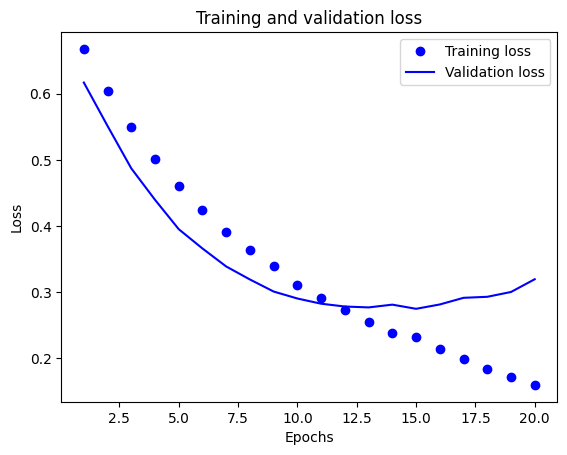

In [11]:
history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1,len(loss)+1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()



# Saving the model

In [13]:
model.save('sentiment_model.h5')

In [2]:
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
from keras.datasets import imdb
from keras.preprocessing.sequence import pad_sequences

# Load raw IMDB dataset (word indices)
word_index = imdb.get_word_index()
index_word = {v: k for k, v in word_index.items()}

# Load the dataset (only the training data is needed for vectorizer)
(x_train, _), _ = imdb.load_data()

# Decode reviews back to text
def decode_review(encoded_review):
    return ' '.join([index_word.get(i - 3, '?') for i in encoded_review])

train_texts = [decode_review(review) for review in x_train]

# Vectorize
vectorizer = TfidfVectorizer(max_features=10000)
vectorizer.fit(train_texts)

# Save the vectorizer
with open("vectorize.pkl", "wb") as f:
    pickle.dump(vectorizer, f)

print("Vectorizer saved successfully using Keras IMDB dataset!")


Vectorizer saved successfully using Keras IMDB dataset!
